In [1]:

import pandas as pd
from datetime import datetime
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

df= pd.read_csv("databreaches650.csv")


#------Formatting1----converting object to datetime format--#


df['BreachDate'] = pd.to_datetime(df['BreachDate'], infer_datetime_format=True)
df['AddedDate'] = pd.to_datetime(df['AddedDate'], infer_datetime_format=True)
df['ModifiedDate'] = pd.to_datetime(df['ModifiedDate'], infer_datetime_format=True)

# print(df.info())

#--------Finding reported days----------------------------#

df['ReportedDays'] = (df['AddedDate'] - df['BreachDate']).dt.days

# print(df.ReportedDays)

# print(df.info())

#------Finding 5 largest/lowest reported days--------------#

b = df.nlargest(n=5, columns=['ReportedDays'])
c = df.nsmallest(n=5, columns=['ReportedDays'])

# print(b)
# print(c)


#------Finding descriptive statistics for reporteddays-----#

x_bar = stats.mean(df.ReportedDays)
median= stats.median(df.ReportedDays)

#-------Extracting year from the date field----------------#

df['Reported_year'] = df['AddedDate'].dt.year
df['Breach_year'] = df['BreachDate'].dt.year

# print(df.Reported_year)
# print(df.Breach_year)

#----One-hot encoding for two selected categorical columns---# confirm with team!!!!!

one_hot_encoded_data = pd.get_dummies(df, columns = ['IsFabricated', 'IsSensitive'])

# print(one_hot_encoded_data)

#-----binary encoding-----------------------#

# df.IsFabricated[df.IsFabricated == 'TRUE'] = 1
# df.IsFabricated[df.IsFabricated == 'FALSE'] = 0

# df.IsSensitive[df.IsSensitive == 'TRUE'] = 1
# df.IsSensitive[df.IsSensitive == 'FALSE'] = 0

df.loc[df['IsVerified'] == "FALSE",
            'IsVerified'] = 0

df.loc[df['IsVerified'] == "TRUE",
             'IsVerified'] = 1

df['IsVerified'] = (df['IsVerified'] == 1).astype(int)

df.loc[df['IsSensitive'] == "FALSE",
            'IsSensitive'] = 0

df.loc[df['IsSensitive'] == "TRUE",
            'IsSensitive'] = 1

df['IsSensitive'] = (df['IsSensitive'] == 1).astype(int)

# print(df.IsFabricated)


#---------Grouping the data classes---------------#



#---------Dropping unwanted attributes------------#

df = df.drop(['Name', 'Domain', 'ModifiedDate', 'Description', 'AddedDate' ,'LogoPath', 'IsFabricated', 'IsRetired', 'IsMalware'], axis=1)


# x = df['Breach_year']
# y1 = df['PwnCount']
# y2 = df['Ctrv']

# plt.plot(x,y1)

# df.to_csv(
#     r'C:\Masters\Sem 3\S123 PRT564 DATA ANALYTICS AND VISUALISATION\Assignment\codes\clean.CSV', index=False)

# print(df.info())




In [1]:
# sample = df.groupby(['Breach_year'], as_index=False)['PwnCount'].sum()
# lines = sample.plot.line(x='Breach_year', y='PwnCount')

NameError: name 'df' is not defined

In [5]:
# df = df.groupby(pd.cut(df['IsVerified'], bins=2)).IsVerified.count()
# df.plot(kind='bar')

KeyError: 'IsVerified'

Text(0, 0.5, 'Total Pawned count')

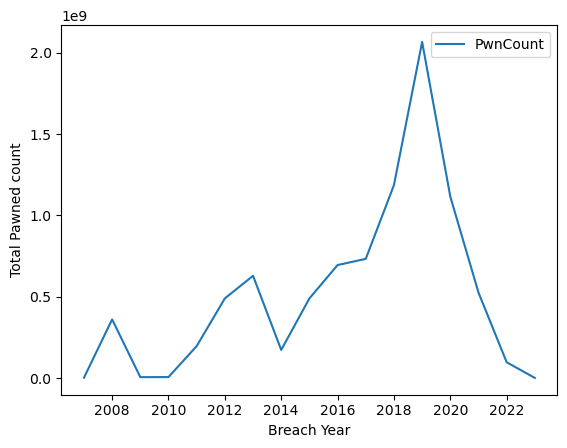

In [12]:
df1 =df= pd.read_csv("Master.csv")
sample = df1.groupby(['Breach_year'], as_index=False)['PwnCount'].sum()
lines = sample.plot.line(x='Breach_year', y='PwnCount')
plt.xlabel('Breach Year')
plt.ylabel('Total Pawned count')


In [7]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Domain              624 non-null    object
 1   PwnCount            624 non-null    int64 
 2   Description         624 non-null    object
 3   DataClasses         624 non-null    object
 4   ReportedDays        624 non-null    int64 
 5   Reported_year       624 non-null    int64 
 6   Breach_year         624 non-null    int64 
 7   IsVerified_False    624 non-null    int64 
 8   IsVerified_True     624 non-null    int64 
 9   IsSensitive_False   624 non-null    int64 
 10  IsSensitive_True    624 non-null    int64 
 11  IsFabricated_False  624 non-null    int64 
 12  IsFabricated_True   624 non-null    int64 
 13  IsRetired_False     624 non-null    int64 
 14  IsRetired_True      624 non-null    int64 
 15  IsSpamList_False    624 non-null    int64 
 16  IsSpamList_True     624 no

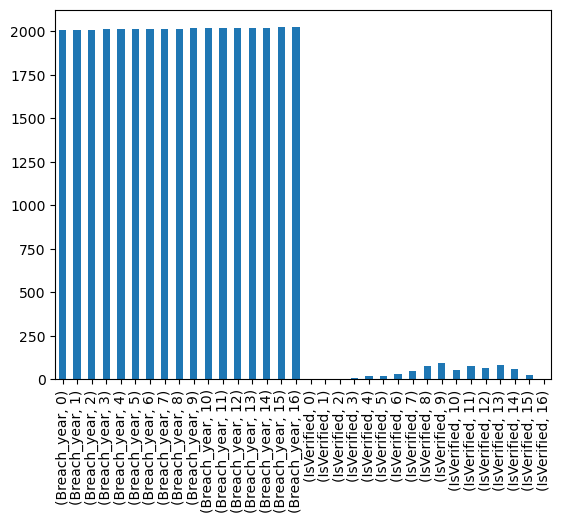

In [28]:
# sample2 = df.groupby(['Breach_year'], as_index=False)['IsVerified'].count()
# bar = sample2.plot(x = 'Breach_year', y='IsVerified', kind='bar', stacked=True)


<AxesSubplot:title={'center':'Verified breaches every year?'}, xlabel='Breach_year'>

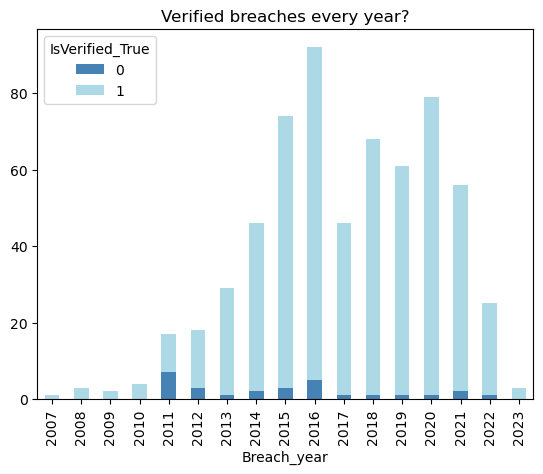

In [9]:
df1.groupby(['Breach_year', 'IsVerified_True']).size().unstack().plot(kind='bar', stacked=True,
             color=['steelblue','lightblue'], title='Verified breaches every year?')

<AxesSubplot:title={'center':'Sensitive data breached every year?'}, xlabel='Breach_year'>

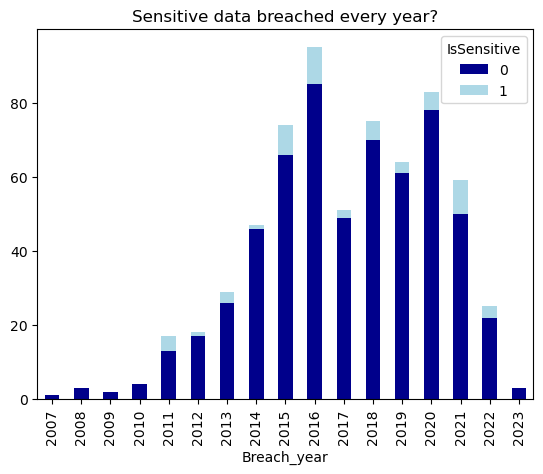

In [42]:
df.groupby(['Breach_year', 'IsSensitive']).size().unstack().plot(kind='bar', stacked=True,
            color=['darkblue','lightblue'], title='Sensitive data breached every year?')

Text(0, 0.5, 'Total delay in reporting breaches')

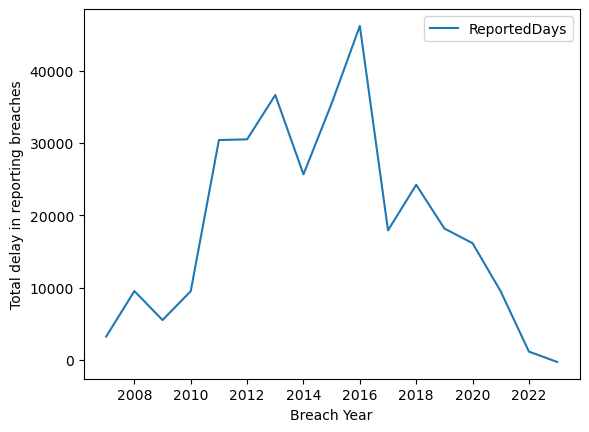

In [11]:
sample = df1.groupby(['Breach_year'], as_index=False)['ReportedDays'].sum()
lines = sample.plot.line(x='Breach_year', y='ReportedDays')
plt.xlabel('Breach Year')
plt.ylabel('Total delay in reporting breaches')



<function matplotlib.pyplot.show(close=None, block=None)>

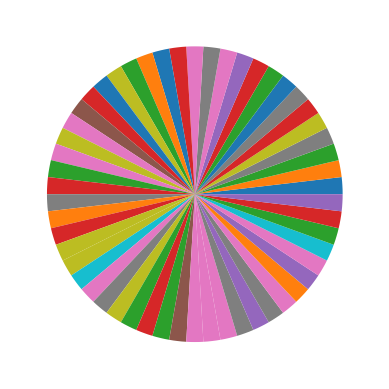

In [41]:

# df1 = df[['Breach_year', 'IsSensitive' ,'ReportedDays']]
# print(df.info())

sample = df.IsSensitive

# sum_RT = df.groupby(sample).sum()
# var = df.Breach_year
plt.pie(sample)
plt.show

In [1]:

# # importing packages
# import seaborn
 
# df1 = df.groupby(['Breach_year', 'IsSensitive']).count()['ReportedDays']
 
# # plot the result
# df1.unstack().plot()
# plt.xticks(rotation=45)
# plt.show()

ModuleNotFoundError: No module named 'seaborn'

KeyError: 'IsSensitive'

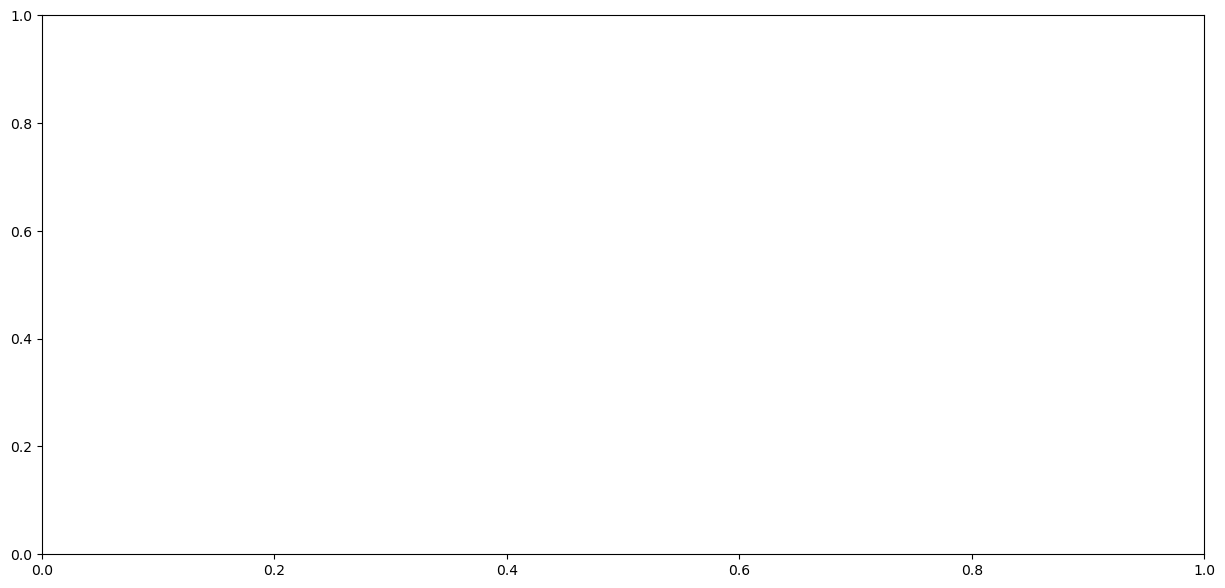

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['Breach_year', 'IsSensitive']).count()['Title'].unstack().plot(ax=ax)
plt.title("Sensitive vs non sensitive data breached through the years")
plt.ylable("Reported Days")

In [12]:
dp = df.groupby(by=['Breach_year'],
                  as_index=False).plot(x=['Title'],
                                       y=['ReportedDays', 'PwnCount'],
                                       figsize=(16, 6), linestyle='dashed',marker='D', markersize=5,
                                       title='Pwn count and delay in reporting', legend=True, colormap='jet')

ValueError: x must be a label or position

<AxesSubplot:title={'center':'Percentage of Sensitive data stolen'}, ylabel='PwnCount'>

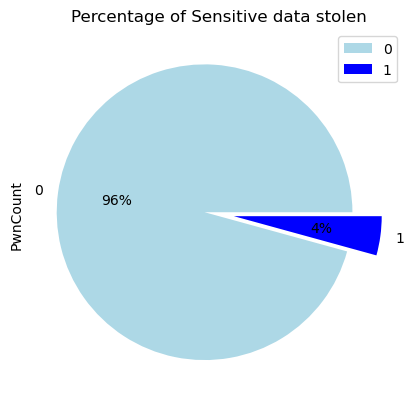

In [22]:

colors = ['lightblue', 'blue']

explode = (0.1,0.1)

df.groupby(['IsSensitive']).sum().plot(kind='pie', y='PwnCount', title = "Percentage of Sensitive data stolen" ,explode=explode, colors=colors, autopct='%1.0f%%')

<AxesSubplot:title={'center':'Percentage of verified Data breaches'}, ylabel='PwnCount'>

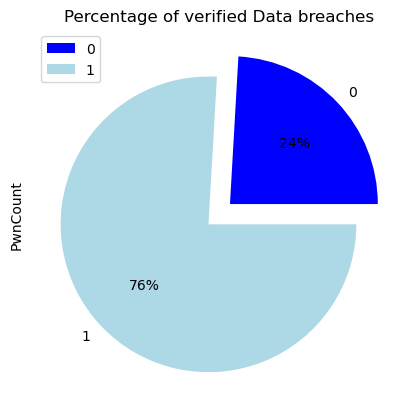

In [25]:
colors = ['blue', 'lightblue']

explode = (0.1,0.1)

df.groupby(['IsVerified']).sum().plot(kind='pie', y='PwnCount', title = "Percentage of verified Data breaches" ,explode=explode, colors=colors, autopct='%1.0f%%')

<AxesSubplot:title={'center':'Percentage of spam list'}, ylabel='PwnCount'>

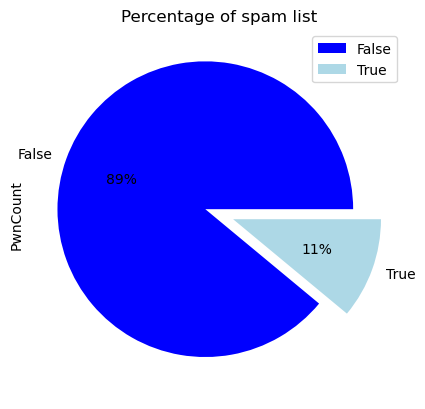

In [30]:
colors = ['blue', 'lightblue']

explode = (0.1,0.1)

df.groupby(['IsSpamList']).sum().plot(kind='pie', y='PwnCount', title = "Percentage of spam list" ,explode=explode, colors=colors, autopct='%1.0f%%')



                  Name                Title                 Domain  \
363  MinecraftWorldMap  Minecraft World Map  minecraftworldmap.com   
375               MPGH                 MPGH               mpgh.net   
489           Seedpeer             Seedpeer            seedpeer.eu   
529        SumoTorrent         Sumo Torrent         sumotorrent.sx   
159      DivXSubTitles       DivX SubTitles      divxsubtitles.net   

     BreachDate        AddedDate     ModifiedDate  PwnCount  \
363  15/01/2016  29/08/2016 1:07  29/08/2016 1:07     71081   
375  22/10/2015  26/10/2015 3:20  26/10/2015 3:20   3122898   
489  12/07/2015   9/03/2016 2:49   9/03/2016 2:49    281924   
529  21/06/2014   9/03/2016 1:23   9/03/2016 1:23    285191   
159   1/01/2010  14/06/2022 2:57  14/06/2022 4:55    783058   

                                           Description  \
363  In approximately January 2016, the Minecraft W...   
375  In October 2015, the multiplayer game hacking ...   
489  In July 2015, the tor

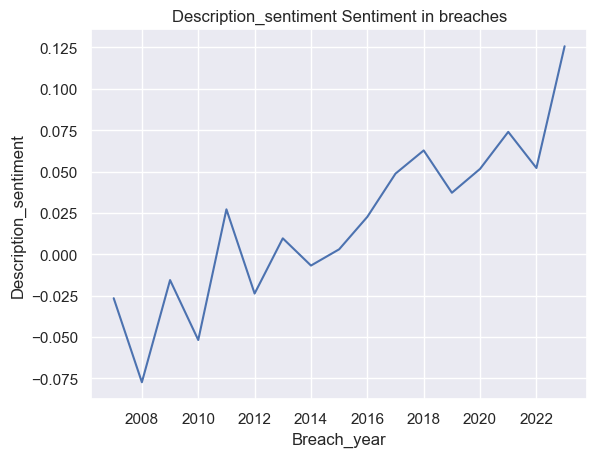

In [1]:
import pandas as pd
from collections import Counter
from textblob import TextBlob

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

df = pd.read_csv("databreaches650.csv")

#To find out the domains that were subjected to most frequent breaches

df['Domain'].dropna(inplace=True)
 
word_counts = Counter(df['Domain'])
 
# print(word_counts.most_common(16))

#------breaches those involved health data-----------------------------#

df_health = df[df['DataClasses'].str.contains('Infect Dis', regex=False)]

# print(df_health)

#------------To find out the sentiment score of each breach------------------------------------------------#

df['Description_sentiment'] = df['Description'].apply(lambda abstract: TextBlob(abstract).sentiment.polarity)

b = df.nlargest(n=5, columns=['Description_sentiment'])
c = df.nsmallest(n=5, columns=['Description_sentiment'])

# print(b)
print(c)

# print(df)


df['BreachDate'] = pd.to_datetime(df['BreachDate'], infer_datetime_format=True)
df['AddedDate'] = pd.to_datetime(df['AddedDate'], infer_datetime_format=True)
df['ModifiedDate'] = pd.to_datetime(df['ModifiedDate'], infer_datetime_format=True)

df['Reported_year'] = df['AddedDate'].dt.year
df['Breach_year'] = df['BreachDate'].dt.year

df_group = df.groupby(['Breach_year'])['Description_sentiment'].mean()

plt.xlabel('Breach_year')

plt.ylabel('Description_sentiment')

plt.title('Description_sentiment Sentiment in breaches')

plt.plot(df_group.index, df_group.values)




                  Name                Title                 Domain  \
363  MinecraftWorldMap  Minecraft World Map  minecraftworldmap.com   
375               MPGH                 MPGH               mpgh.net   
489           Seedpeer             Seedpeer            seedpeer.eu   
529        SumoTorrent         Sumo Torrent         sumotorrent.sx   
159      DivXSubTitles       DivX SubTitles      divxsubtitles.net   

     BreachDate        AddedDate     ModifiedDate  PwnCount  \
363  15/01/2016  29/08/2016 1:07  29/08/2016 1:07     71081   
375  22/10/2015  26/10/2015 3:20  26/10/2015 3:20   3122898   
489  12/07/2015   9/03/2016 2:49   9/03/2016 2:49    281924   
529  21/06/2014   9/03/2016 1:23   9/03/2016 1:23    285191   
159   1/01/2010  14/06/2022 2:57  14/06/2022 4:55    783058   

                                           Description  \
363  In approximately January 2016, the Minecraft W...   
375  In October 2015, the multiplayer game hacking ...   
489  In July 2015, the tor

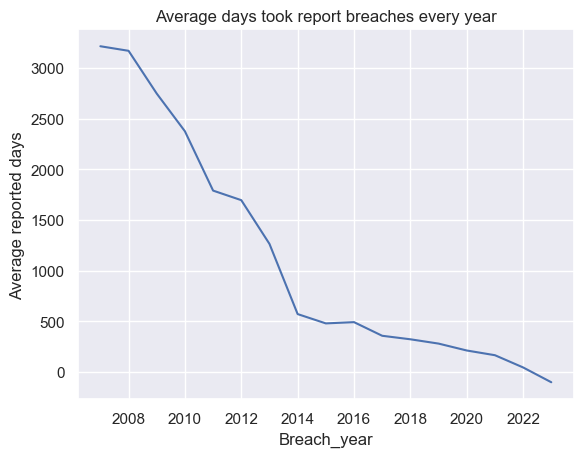

In [4]:
import pandas as pd
from collections import Counter
from textblob import TextBlob

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

df = pd.read_csv("databreaches650.csv")

#To find out the domains that were subjected to most frequent breaches

df['Domain'].dropna(inplace=True)
 
word_counts = Counter(df['Domain'])
 
# print(word_counts.most_common(16))

#------breaches those involved health data-----------------------------#

df_health = df[df['DataClasses'].str.contains('Infect Dis', regex=False)]

# print(df_health)

#------------To find out the sentiment score of each breach------------------------------------------------#

df['Description_sentiment'] = df['Description'].apply(lambda abstract: TextBlob(abstract).sentiment.polarity)

b = df.nlargest(n=5, columns=['Description_sentiment'])
c = df.nsmallest(n=5, columns=['Description_sentiment'])

# print(b)
print(c)

# print(df)

#-------Plotting sentiment score vs year of breach---------------------#


df['BreachDate'] = pd.to_datetime(df['BreachDate'], infer_datetime_format=True)
df['AddedDate'] = pd.to_datetime(df['AddedDate'], infer_datetime_format=True)
df['ModifiedDate'] = pd.to_datetime(df['ModifiedDate'], infer_datetime_format=True)

df['Reported_year'] = df['AddedDate'].dt.year
df['Breach_year'] = df['BreachDate'].dt.year

df_group = df.groupby(['Breach_year'])['Description_sentiment'].mean()

# plt.xlabel('Breach_year')

# plt.ylabel('Description_sentiment')

# plt.title('Description_sentiment Sentiment in breaches')

# plt.plot(df_group.index, df_group.values)

df['ReportedDays'] = (df['AddedDate'] - df['BreachDate']).dt.days

df_group1 = df.groupby(['Breach_year'])['ReportedDays'].mean()

plt.xlabel('Breach_year')

plt.ylabel('Average reported days')

plt.title('Average days took report breaches every year')

plt.plot(df_group1.index, df_group1.values)







In [ ]:
import pandas as pd
from collections import Counter
from textblob import TextBlob

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

df = pd.read_csv("databreaches650.csv")

#To find out the domains that were subjected to most frequent breaches

df['Domain'].dropna(inplace=True)
 
word_counts = Counter(df['Domain'])
 
# print(word_counts.most_common(16))

#------breaches those involved health data-----------------------------#

df_health = df[df['DataClasses'].str.contains('Infect Dis', regex=False)]

# print(df_health)

#------------To find out the sentiment score of each breach------------------------------------------------#

df['Description_sentiment'] = df['Description'].apply(lambda abstract: TextBlob(abstract).sentiment.polarity)

b = df.nlargest(n=5, columns=['Description_sentiment'])
c = df.nsmallest(n=5, columns=['Description_sentiment'])

# print(b)
print(c)

# print(df)

#-------Plotting sentiment score vs year of breach---------------------#


df['BreachDate'] = pd.to_datetime(df['BreachDate'], infer_datetime_format=True)
df['AddedDate'] = pd.to_datetime(df['AddedDate'], infer_datetime_format=True)
df['ModifiedDate'] = pd.to_datetime(df['ModifiedDate'], infer_datetime_format=True)

df['Reported_year'] = df['AddedDate'].dt.year
df['Breach_year'] = df['BreachDate'].dt.year

df_group = df.groupby(['Breach_year'])['Description_sentiment'].mean()

# plt.xlabel('Breach_year')

# plt.ylabel('Description_sentiment')

# plt.title('Description_sentiment Sentiment in breaches')

# plt.plot(df_group.index, df_group.values)

#---------to plot average reported days every year-------------#

df['ReportedDays'] = (df['AddedDate'] - df['BreachDate']).dt.days

df_group1 = df.groupby(['Breach_year'])['ReportedDays'].mean()

# plt.xlabel('Breach_year')

# plt.ylabel('Description_sentiment')

# plt.title('Description_sentiment Sentiment in breaches')

# plt.plot(df_group1.index, df_group1.values)


df_group2 = df.groupby(['Breach_year'])['PwnCount'].sum()

plt.xlabel('Breach_year')

plt.ylabel('Total pawned count')

plt.title('Total pawned user accounts every year')

plt.plot(df_group2.index, df_group2.values)


In [8]:

import pandas as pd
from datetime import datetime
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

df2= pd.read_csv("final6.csv")
# df2.drop['Description']
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PwnCount            624 non-null    int64 
 1   Description         624 non-null    object
 2   DataClasses         624 non-null    object
 3   ReportedDays        624 non-null    int64 
 4   Reported_year       624 non-null    int64 
 5   Breach_year         624 non-null    int64 
 6   IsVerified_False    624 non-null    int64 
 7   IsVerified_True     624 non-null    int64 
 8   IsSensitive_False   624 non-null    int64 
 9   IsSensitive_True    624 non-null    int64 
 10  IsFabricated_False  624 non-null    int64 
 11  IsFabricated_True   624 non-null    int64 
 12  IsRetired_False     624 non-null    int64 
 13  IsRetired_True      624 non-null    int64 
 14  IsSpamList_False    624 non-null    int64 
 15  IsSpamList_True     624 non-null    int64 
 16  IsMalware_False     624 no

<Axes: xlabel='Breach_year', ylabel='count'>

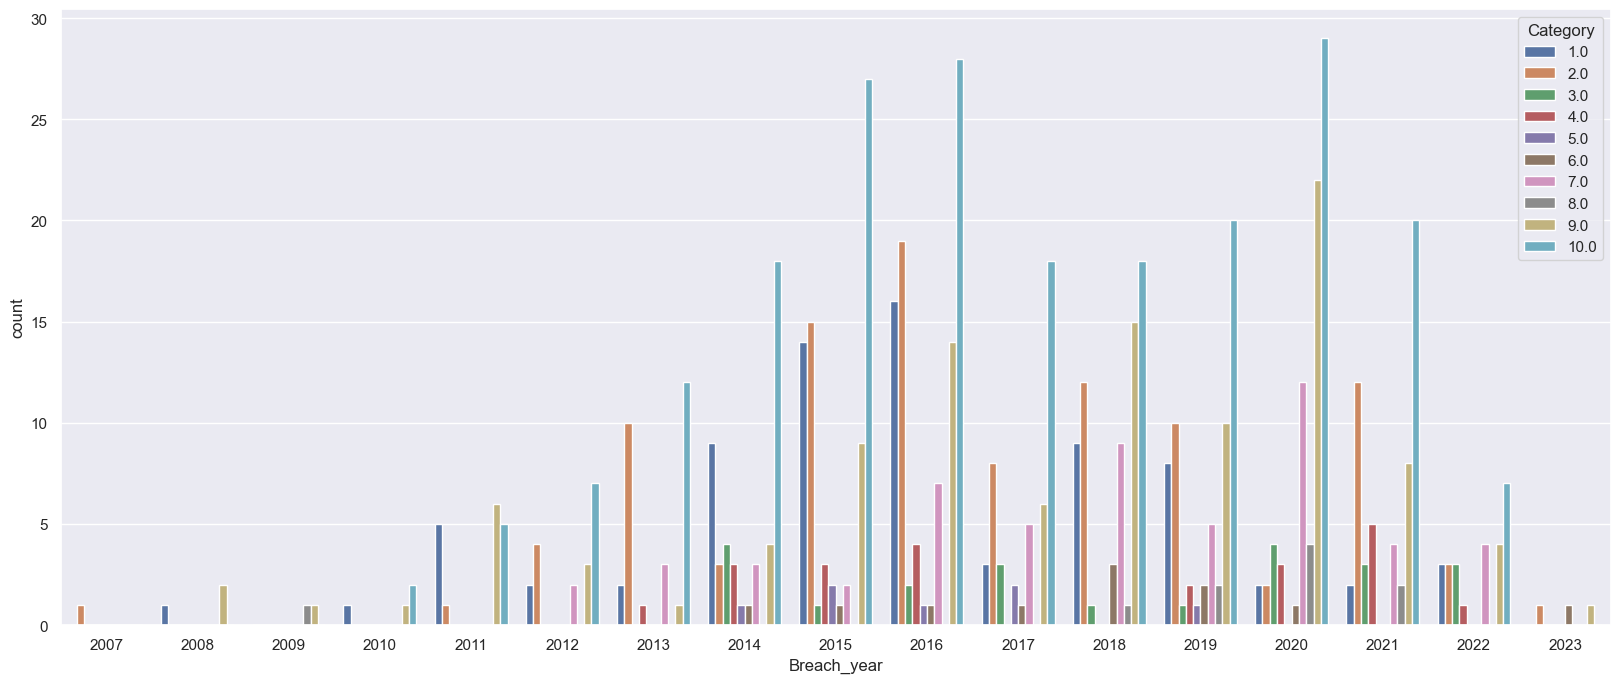

In [17]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

df1 = pd.read_csv("final5.csv")

plt.figure(figsize=(20,8))
sns.countplot(data = df1, x = 'Breach_year', hue = 'Category')

C:\Users\benazir\AppData\Local\Temp\ipykernel_6996\3902661536.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(['Category']).sum().plot(kind='pie', y='PwnCount', title = "Percentage of verified Data breaches" ,explode=explode, colors=colors, autopct='%1.0f%%')


ValueError: 'explode' must be of length 'x'

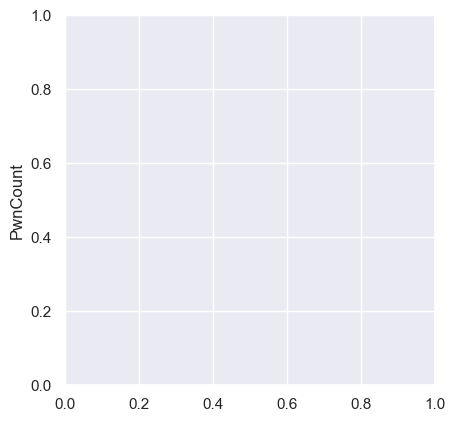

In [18]:
colors = ['blue', 'lightblue']

explode = (0.1,0.1)

df1.groupby(['Category']).sum().plot(kind='pie', y='PwnCount', title = "Percentage of verified Data breaches" ,explode=explode, colors=colors, autopct='%1.0f%%')

In [10]:

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

df2 = pd.read_csv("second.csv")

sample = df2.groupby(['Year'], as_index=False)['Records'].sum()

lines = sample.plot.line(x='Year', y='Records')
plt.xlabel('Breach Year')
plt.ylabel('Total Pawned count')

# print(df2.info)

# plt.figure(figsize=(20,8))
# sns.countplot(data = df2, x = 'Year')

# sample2 = df2.groupby(['Year'], as_index=False)['Records'].sum()
# lines = sample2.plot.line(x='Year', y='Records')
# plt.xlabel('Breach Year')
# plt.ylabel('Total delay in reporting breaches')

TypeError: no numeric data to plot